<a href="https://colab.research.google.com/github/EdwardTong899/Master_Thesis-Shuffle_AES/blob/main/Analyze_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
# df=pd.read_excel("shuffle_5000.xlsx")
df=pd.read_excel("pip_5000.xlsx")



In [6]:
Attack_byte = 2 #根據想要攻擊的S-box做選擇，範圍為0-15

In [7]:
print(df[0][4095])

0.004191728459692924


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4096 entries, 0 to 4095
Columns: 901 entries, 0 to 900
dtypes: float64(898), int64(3)
memory usage: 28.2 MB


In [9]:
temp = []
index_i = Attack_byte*256
for i in range (index_i,index_i+256):
    print(i)
    for j in range(901):
      temp.append(df.loc[i][j])

512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761


In [10]:
df = pd.DataFrame(temp)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230656 entries, 0 to 230655
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       230656 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


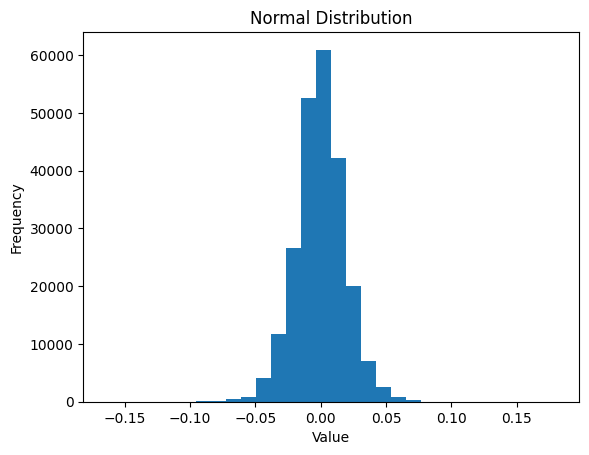

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# 使用matplotlib繪製常態分佈圖
plt.hist(df[0], bins=30)
plt.title("Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


In [13]:
from scipy.stats import shapiro
import pandas as pd
import numpy as np


# 進行Shapiro-Wilk檢驗
stat, p = shapiro(df[0])

# 判斷檢驗結果是否符合常態分佈
alpha = 0.05
if p > alpha:
    print("The data is normally distributed")
else:
    print("The data is not normally distributed")


The data is not normally distributed


/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [14]:
import pandas as pd
import numpy as np

top_corr = 8   #決定想要排名前n個

top_3_scores = df.nlargest(top_corr, 0)

upper_bound = top_3_scores.iloc[top_corr-1][0]

print(len(df[0]))
for i in range(len(df[0])):
  if(df[0][i]>=upper_bound):
    print("key guss = "+str(i//901)+",  time = "+str(i%901)+",  value: "+str(df[0][i]))


230656
key guss = 21,  time = 293,  value: 0.147114563894488
key guss = 21,  time = 294,  value: 0.1782049059230121
key guss = 21,  time = 295,  value: 0.1802800685190074
key guss = 21,  time = 296,  value: 0.1806730082059289
key guss = 21,  time = 297,  value: 0.1795139709696403
key guss = 21,  time = 298,  value: 0.1770316895046755
key guss = 21,  time = 299,  value: 0.1735069586734518
key guss = 21,  time = 300,  value: 0.1692283497678796
